In [386]:
# 패키지 임포트
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

plt.rc("font", family="Malgun Gothic") # matplotlib 한글깨짐

In [337]:
# 데이터 로드 
# 부동산 데이터
train_data=pd.read_csv('C:/Users/bini9/OneDrive/문서/솔트룩스/프로젝트/4차 - EDA&ML/data/train_data.csv', encoding='utf-8')

In [338]:
# 데이터 확인
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,"130,000",4,1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,"117,000",2,1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,"130,000",1,1987,언주로 3
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,"139,500",2,1987,언주로 3
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,"107,500",5,1987,언주로 3
...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,"26,000",2,2003,동일로144길 74
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,"44,000",6,2007,봉화산로27가길 23
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,"54,800",5,2007,봉화산로27가길 23
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,"40,000",5,2007,봉화산로27가길 19


In [339]:
train_data.shape

(240921, 8)

In [415]:
train_data.describe(include='all')

,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,계약년도,계약월,거래금액_로그
count,240921,240921,240921.000000,240921,240921.000000,240921.000000,240921.000000,240921,240921,240921,240921.000000
unique,332,6850,NaN,36,NaN,NaN,NaN,8091,3,12,NaN
top,서울특별시 노원구 상계동,현대,NaN,202006,NaN,NaN,NaN,솔샘로 174,2020,06,NaN
freq,9739,2249,NaN,16413,NaN,NaN,NaN,939,84239,28591,NaN
mean,NaN,NaN,77.932687,NaN,77450.865790,9.117192,2000.225377,NaN,NaN,NaN,11.063829
std,NaN,NaN,30.414776,NaN,54710.422008,6.167072,9.667101,NaN,NaN,NaN,0.617442
min,NaN,NaN,10.020000,NaN,5400.000000,-3.000000,1961.000000,NaN,NaN,NaN,8.594339
25%,NaN,NaN,59.720000,NaN,42800.000000,4.000000,1994.000000,NaN,NaN,NaN,10.664317
50%,NaN,NaN,83.420000,NaN,63000.000000,8.000000,2001.000000,NaN,NaN,NaN,11.050906
75%,NaN,NaN,84.970000,NaN,92000.000000,13.000000,2007.000000,NaN,NaN,NaN,11.429555


In [341]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240921 entries, 0 to 240920
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       240921 non-null  object 
 1   단지명       240921 non-null  object 
 2   전용면적(㎡)   240921 non-null  float64
 3   계약년월      240921 non-null  int64  
 4   거래금액(만원)  240921 non-null  object 
 5   층         240921 non-null  int64  
 6   건축년도      240921 non-null  int64  
 7   도로명       240921 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 14.7+ MB


In [342]:
train_data.isna().sum()

시군구         0
단지명         0
전용면적(㎡)     0
계약년월        0
거래금액(만원)    0
층           0
건축년도        0
도로명         0
dtype: int64

In [343]:
#### 전처리
## 거래금액
# 거래금액 데이터 컬럼명 변경
train_data.rename(columns = {'거래금액(만원)':'거래금액'}, inplace=True)

In [344]:
# 거래금액 , 제거 후 숫자형 변환
train_data['거래금액'] = train_data['거래금액'].str.replace(',','').astype(int)

C:\Users\bini9\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='거래금액', ylabel='Density'>

C:\Users\bini9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bini9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


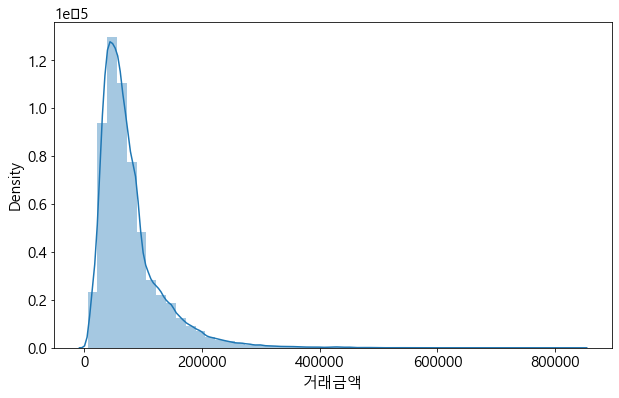

In [371]:
# 거래 가격 분포 확인
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train_data["거래금액"])


# fig=plt.figure(figsize=(10, 5))
# plt.hist(train_data['거래금액'],bins=50)
# plt.title('거래금액 히스토그램')
# plt.xlabel('거래금액')
# plt.show()

In [372]:
# 거래 금액 로그변환
train_data['거래금액_로그'] = np.log1p(train_data['거래금액'])

C:\Users\bini9\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='거래금액_로그', ylabel='Density'>

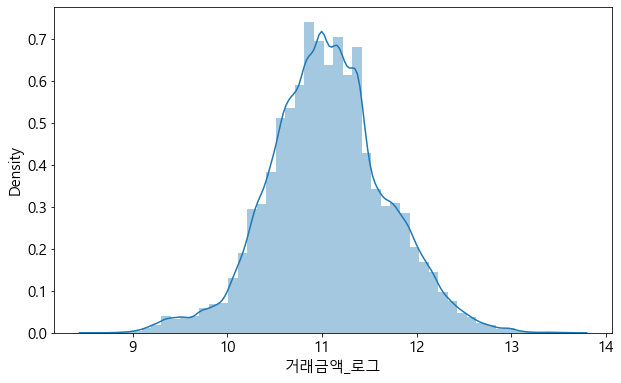

In [373]:
# 로그 거래 가격 분포 확인
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train_data['거래금액_로그'])

0.17049


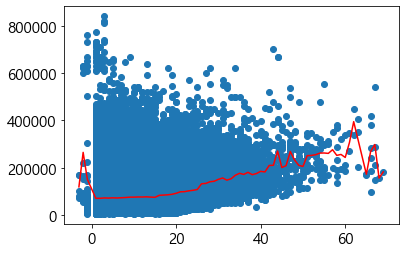

In [400]:
# 층과 거래금액의 상관계수 확인
print(round(np.corrcoef(train_data['층'], train_data['거래금액'])[0,1],5)) #0.17049

# 시각화
plt.scatter(train_data['층'], train_data['거래금액'])
plt.plot( train_data['거래금액'].groupby(train_data['층']).mean(), color='red')
plt.show()

0.18676


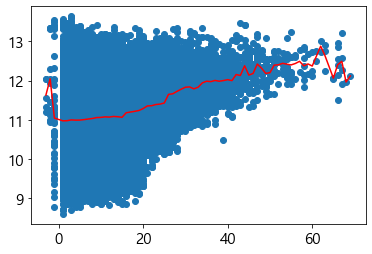

In [399]:
# 층과 로그 거래금액의 상관계수 확인 - 로그변환한 값이 상관관계가 더 높다
print(round(np.corrcoef(train_data['층'], train_data['거래금액_로그'])[0,1],5)) #0.18676

# 시각화
plt.scatter(train_data['층'], train_data['거래금액_로그'])
plt.plot( train_data['거래금액_로그'].groupby(train_data['층']).mean(), color='red')
plt.show()

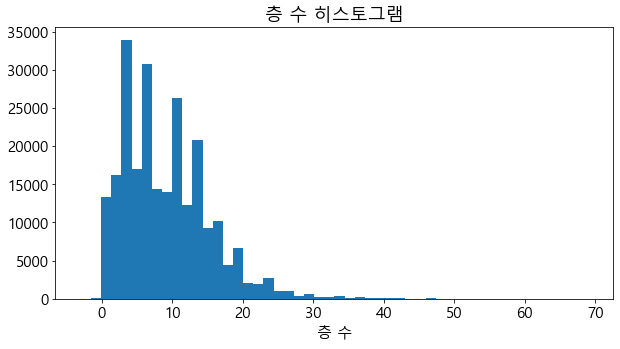

In [348]:
# 층 변수 분포 확인
fig=plt.figure(figsize=(10, 5))
plt.hist(train_data['층'],bins=50)
plt.title('층 수 히스토그램')
plt.xlabel('층 수')
plt.show()

In [364]:
# 층 중 음수 개수 : 70개, 전체의 약 0.03%
sum(train_data['층']<=0)

70

In [365]:
# 층 중 음수 개수 확인
train_data.loc[train_data['층']<0,'층'].value_counts()

-1    52
-2    13
-3     5
Name: 층, dtype: int64

In [349]:
# 높은 층수 확인
train_data.loc[train_data['층']==69,'단지명']

65640    현대하이페리온
Name: 단지명, dtype: object

In [438]:
# 이상치 처리 방법에 따른 로그 거래금액과의 correlation 확인

# 음수가 아닌 층과 로그 거래금액의 상관계수 확인
df_floor_above_0 =train_data.loc[train_data['층']>0,['층', '거래금액_로그']]
delete_outlier_corr=round(np.corrcoef(df_floor_above_0['층'], df_floor_above_0['거래금액_로그'])[0,1],5) # 0.18714

# 음수 층의 -를 제거해서 양수로 변환 
floor_plus = [floor*(-1) if floor<0 else floor for floor in train_data['층'] ]
# 로그 거래금액의 상관계수 확인
replace_plus_corr=round(np.corrcoef(floor_plus, train_data['거래금액_로그'])[0,1],5)#0.18687

# 음수 층을 모두 최저층인 1로 변환 
floor_one = [1 if floor<0 else floor for floor in train_data['층'] ]
# 로그 거래금액의 상관계수 확인
replace_one_corr = round(np.corrcoef(floor_one, train_data['거래금액_로그'])[0,1],5) #0.18685

# 층수의 평균값으로 변환
floor_mean = [train_data['층'].mean() if floor<0 else floor for floor in train_data['층'] ]
replace_mean_corr = round(np.corrcoef(floor_mean, train_data['거래금액_로그'])[0,1],5)

# corr비교
pd.DataFrame({'delete_outlier':[delete_outlier_corr], 'replace_plus':[replace_plus_corr],
             'replace_one':[replace_one_corr],'replace_mean':[replace_mean_corr]}, index = ['correlation'])

# 삭제 했을때가 가장 correlation이 높다

,delete_outlier,replace_plus,replace_one,replace_mean
correlation,0.18714,0.18687,0.18685,0.18702


In [445]:
train_data[train_data['층']<0].index

Int64Index([ 23286,  43638,  57552,  71718,  72357,  73092,  73107,  73112,
             73154,  73166,  73221,  76616,  76635,  76642,  76970,  82392,
             86202, 102946, 124275, 130621, 130698, 130699, 134337, 148906,
            149365, 149621, 150055, 150064, 150083, 150119, 150235, 150265,
            151443, 152642, 153146, 153673, 153720, 158961, 172433, 181682,
            181695, 183042, 194631, 200301, 201978, 202596, 203140, 203142,
            203766, 207366, 213928, 213940, 216034, 217991, 231296, 231813,
            231815, 232052, 232541, 232551, 232570, 232574, 233993, 236080,
            236085, 236095, 237080, 237439, 237530, 237531],
           dtype='int64')

In [449]:
## 위의 결과에 따라 이상치인 값들을 제거
train_data.drop(train_data.loc[train_data['층']<0].index, inplace=True)

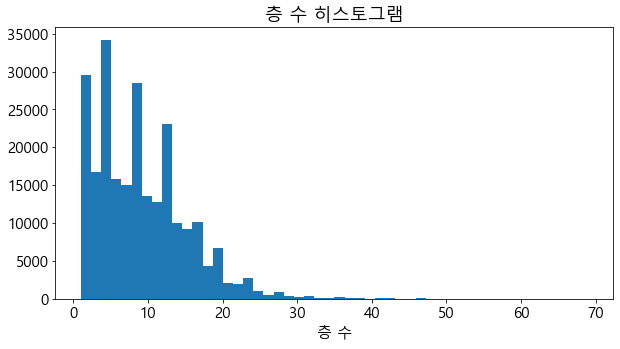

In [451]:
# 삭제 후 층 변수 분포
fig=plt.figure(figsize=(10, 5))
plt.hist(train_data['층'],bins=50)
plt.title('층 수 히스토그램')
plt.xlabel('층 수')
plt.show()

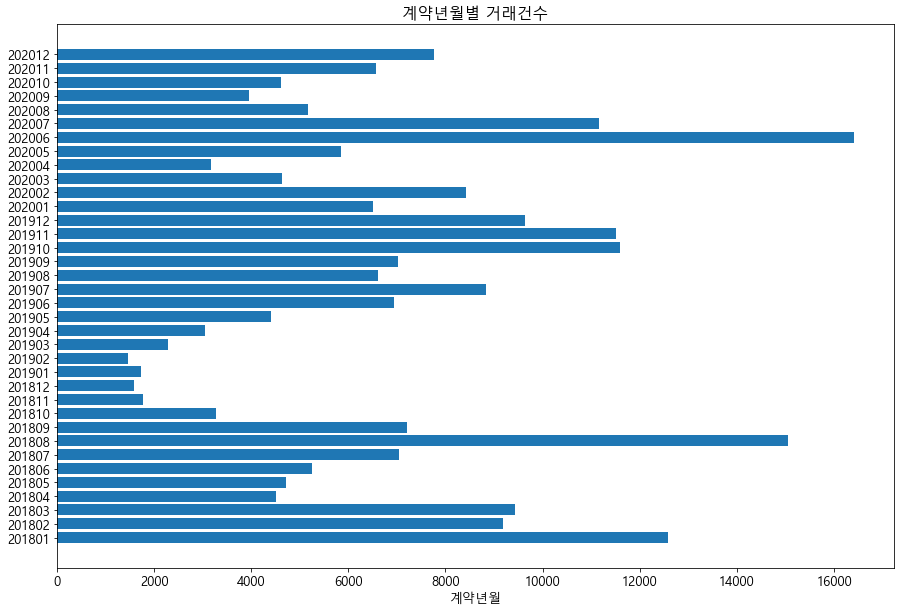

In [351]:
## 계약년월 변수 - 이상치로 판단할 값은 없는것으로 보임
train_data['계약년월'] = train_data['계약년월'].astype('str') # 시각화할때 int형으로 들어가면 숫자 간격이 동일하지 않아서 이상하게 출력됌
train_data_df_ym = pd.DataFrame(train_data['계약년월'].value_counts())

plt.rc('font', size=13)
fig=plt.figure(figsize=(15, 10))
plt.barh(train_data_df_ym.sort_index().index,train_data_df_ym.sort_index().iloc[:,0])
plt.title('계약년월별 거래건수')
plt.xlabel('계약년월')
plt.show()

In [355]:
## 계약년월
# 계약년도와 계약월 컬럼 생성(EDA)
train_data['계약년도'] = train_data['계약년월'].map(lambda x : str(x)[:4])
train_data['계약월'] = train_data['계약년월'].map(lambda x : str(x)[4:])
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,계약년도,계약월
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,2018,01
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,2018,01
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,2018,01
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,2018,03
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,2018,04
...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,2020,08
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,2020,07
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,2020,12
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,2020,09


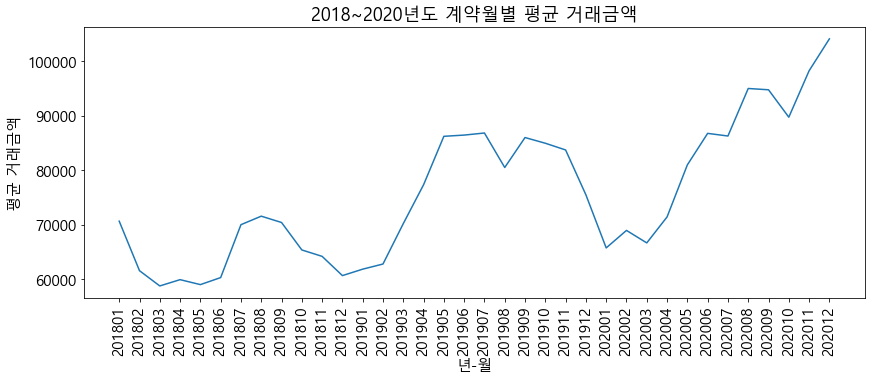

In [356]:
# 계약년월 별로 그룹화 후 평균 거래금액 산출 
train_data_grouped_ym_mean = train_data.groupby(train_data['계약년월'])['거래금액'].mean()

# 시각화
plt.rc('font', size=15)
fig=plt.figure(figsize=(14, 5))
# plt.boxplot(train_data['계약년월'], train_data['거래금액'])
plt.plot(train_data_grouped_ym_mean)
plt.xticks(rotation='vertical')
plt.title('2018~2020년도 계약월별 평균 거래금액')
plt.xlabel('년-월')
plt.ylabel('평균 거래금액')
plt.show()

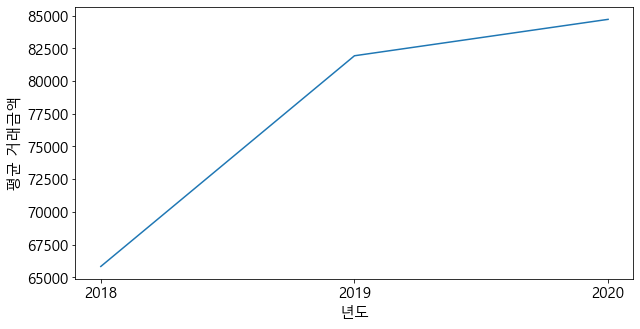

In [357]:
# 계약년도 별로 그룹화 후 평균 거래금액 산출 
# train_data['계약년도'] = train_data['계약년도'].astype('str')
train_data_year_mean = train_data.groupby(train_data['계약년도'])['거래금액'].mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(train_data_year_mean)
plt.xlabel('년도')
plt.ylabel('평균 거래금액')
plt.show()

In [358]:
# 각 년도 마다 월 별로 그룹화 후 평균 거래금액 산출 
train_data_grouped_ym_mean_2018 = train_data[train_data['계약년도']=='2018'].groupby(train_data['계약월'])['거래금액'].mean()
train_data_grouped_ym_mean_2019 = train_data[train_data['계약년도']=='2019'].groupby(train_data['계약월'])['거래금액'].mean()
train_data_grouped_ym_mean_2020 = train_data[train_data['계약년도']=='2020'].groupby(train_data['계약월'])['거래금액'].mean()

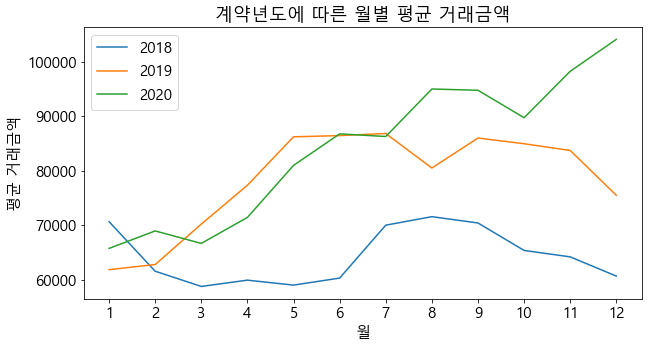

In [470]:
# 시각화
plt.rc('font', size=15)
fig=plt.figure(figsize=(10, 5))
plt.plot(list(range(1,13)), train_data_grouped_ym_mean_2018, label = '2018')
plt.plot(list(range(1,13)), train_data_grouped_ym_mean_2019, label = '2019')
plt.plot(list(range(1,13)), train_data_grouped_ym_mean_2020, label = '2020')

plt.legend()
plt.title('계약년도에 따른 월별 평균 거래금액')
plt.xticks(list(range(1,13)))
plt.xlabel('월')
plt.ylabel('평균 거래금액')
plt.show()
# 월별 추이가 년도별로 매우 다르고 시간에 따른 흐름이 중요하기 때문에 모형에는 '계약년월' 변수만 추가